# Analysing customer churn rate in Telecommunication industry.
#predict Behaviour to retain customers.

About Dataset

Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop
focused customer retention programs." [IBM Sample Data Sets]


Content
Each row represents a customer, each column contains customer’s attributes described on the
column Metadata.


The data set includes information about:
• Customers who left within the last month – the column is called Churn


• Services that each customer has signed up for – phone, multiple lines, internet, online
security, online backup, device protection, tech support, and streaming TV and movies


• Customer account information – how long they’ve been a customer, contract, payment
method, paperless billing, monthly charges, and total charges


• Demographic info about customers – gender, age range, and if they have partners and
dependents

The project will cover:



✅ Data Loading & Preprocessing


✅ Handling Missing Values & Data Cleaning


✅ Descriptive Statistics & Summary


✅ Visualizations (Univariate, Bivariate, Multivariate Analysis)


✅ Insights on Churn Behavior

In [ ]:
# load important libraries for EDA project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Lets load the data into df variable

In [ ]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
#Lets check whether the data is uploaded or not? lets print df

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
# As we seen,the data is huge .so all columns not showing after printing df.
# so lets check the total columns name.


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# lest check the shape of data.

In [ ]:
print("Dataset shape:-",df.shape)

Dataset shape:- (7043, 21)


Insights:-

1- The dataset contains 7043 rows and 21 columns (features).

2- Each row represent a unique customer with various attributes related to demographic,services, and billing.

3- The dataset size is sufficent for meaningful analysis and predictive modelling.

4-with 21 features,we have a good mix of categorical and numerical data to explore customer behaviour and churn pattern.


In [ ]:
# so lets check datatypes of each column

In [ ]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


Insights:-

1- most of the columns are categorical(object type).

2- Seniorcitizen is stored as integer(int64),but since its a binary variable (0 and 1's),it can be treated as categorical.

3- Monthly charges is correctly stored in float64. good for numerical analysis

4-Totalcharges is stored as object ,which seems incorrect since it represent a numerical value. It may contain missing values or be formatted incorrectly. We need to convert it to float for proper analysis.

In [ ]:
#convert totalcharges to numeric

In [ ]:
df['TotalCharges']=pd.to_numeric(df["TotalCharges"],errors='coerce')
#forcing errors ='coerce' to handle any non numeric values as NaN

In [ ]:
#check the conversion

In [ ]:
df['TotalCharges'].dtypes

dtype('float64')

In [ ]:
#check for missing values in each columns

In [ ]:
missing_values=df.isnull().sum()

In [ ]:
#Display columns with missing values only
missing_values[missing_values >0]

,0
TotalCharges,11


Insights:-

1- Only one column ,TotalCharges has miising values(11 missing entries)

2- Since TotalCharges is now numeric, these missing values were likely empty spaces in the original dataset before conversion.

3-Possible ways to handle missing vales:-



*   fill them with median or mean of TotalCharges
*   Fill them with zero, but total charges possibly not be zero.
*   Drop these 11 rows. but if we do 11 customers also drop from 7043. we may loss (~0.16%) of data

*   so better to fill the missing values.


*   so better to fill with median because median is good if we may contain outliers.



In [ ]:
df["TotalCharges"].median()

1397.475

In [ ]:
df["TotalCharges"].fillna(df['TotalCharges'].median(),inplace=True)

<ipython-input-21-1a4aca33a42f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df['TotalCharges'].median(),inplace=True)


In [ ]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [ ]:
#lets check for the duplicate records

In [ ]:
duplicate_count=df.duplicated().sum()

In [ ]:
duplicate_count

np.int64(0)

In [ ]:
#Since the number of duplicate records is zero,
#it means each row in your dataset is unique.

In [ ]:
#lets check is there any typos ,extra spaces or unexpected values in categorical features

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
categorical_cols=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod',  'Churn']

In [ ]:
for col in categorical_cols:
    print(f"unique values in {col}is :-")
    print(df[col].unique(),"\n")

unique values in genderis :-
['Female' 'Male'] 

unique values in SeniorCitizenis :-
[0 1] 

unique values in Partneris :-
['Yes' 'No'] 

unique values in Dependentsis :-
['No' 'Yes'] 

unique values in PhoneServiceis :-
['No' 'Yes'] 

unique values in MultipleLinesis :-
['No phone service' 'No' 'Yes'] 

unique values in InternetServiceis :-
['DSL' 'Fiber optic' 'No'] 

unique values in OnlineSecurityis :-
['No' 'Yes' 'No internet service'] 

unique values in OnlineBackupis :-
['Yes' 'No' 'No internet service'] 

unique values in DeviceProtectionis :-
['No' 'Yes' 'No internet service'] 

unique values in TechSupportis :-
['No' 'Yes' 'No internet service'] 

unique values in StreamingTVis :-
['No' 'Yes' 'No internet service'] 

unique values in StreamingMoviesis :-
['No' 'Yes' 'No internet service'] 

unique values in Contractis :-
['Month-to-month' 'One year' 'Two year'] 

unique values in PaperlessBillingis :-
['Yes' 'No'] 

unique values in PaymentMethodis :-
['Electronic check' 'Mai

In [ ]:
#lets check for the distribution of numerical features.
#also check the outliers.if any.we can handle the outliers

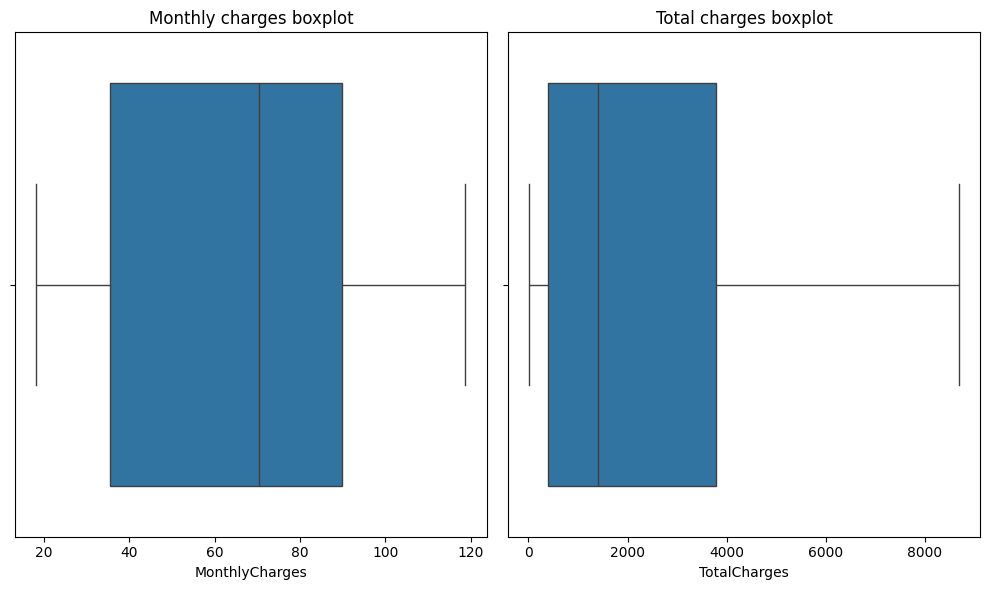

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(x='MonthlyCharges',data=df)
plt.title('Monthly charges boxplot')

plt.subplot(1,2,2)
sns.boxplot(x='TotalCharges',data=df)
plt.title('Total charges boxplot')

plt.tight_layout()


Since there are no outliers in the MonthlyCharges and TotalCharges columns, here are some key points:

Clean Data Distribution:

No extreme values are distorting the distribution, making the analysis more reliable.

This means that the data is already well-behaved for statistical analysis and modeling.


No Need for Transformation or Removal:

Outlier treatment (such as capping or transformation) is not required, which can simplify the preprocessing pipeline.

Models like linear regression or tree-based models (e.g., decision trees, random forests) will not be biased by extreme values.


Confidence in Results:

Since the data does not have extreme values, it suggests the accuracy of insights will be better and the model won't be influenced by data anomalies.

In [ ]:
#so ,move forwards and check the statistical measures for numerical features

In [ ]:
df[['TotalCharges','MonthlyCharges','tenure']].describe()

,TotalCharges,MonthlyCharges,tenure
count,7043.000000,7043.000000,7043.000000
mean,2281.916928,64.761692,32.371149
std,2265.270398,30.090047,24.559481
min,18.800000,18.250000,0.000000
25%,402.225000,35.500000,9.000000
50%,1397.475000,70.350000,29.000000
75%,3786.600000,89.850000,55.000000
max,8684.800000,118.750000,72.000000


Insights from the Summary Statistics:

TotalCharges:

Mean: The average total charge per customer is ₹2281.92.

Median: The middle value is ₹1397.48, which is significantly lower than the mean, indicating a right-skewed distribution.

Min & Max: The minimum total charge is ₹18.80, and the maximum is ₹8684.80, suggesting there are significant variations in the total charges.

Standard Deviation: The high standard deviation (₹2265.27) indicates that total charges vary widely from the mean, with some customers likely having very high charges compared to others.

MonthlyCharges:

Mean: The average monthly charge is ₹64.76.

Median: The median is ₹70.35, which is slightly higher than the mean, indicating that a higher portion of customers have higher monthly charges.

Min & Max: The minimum monthly charge is ₹18.25, and the maximum is ₹118.75. This range is relatively narrow compared to TotalCharges, suggesting more consistency in the monthly charges.

Standard Deviation: The standard deviation is ₹30.09, showing that there is moderate variability in monthly charges.

tenure:

Mean: The average customer tenure is 32.37 months, implying that customers tend to stay with the service for a moderate duration.

Median: The median is 29 months, which is slightly lower than the mean, suggesting that there may be a few long-term customers who increase the average tenure.

Min & Max: The minimum tenure is 0 months (possibly a customer who just started or is new) and the maximum is 72 months, indicating the maximum duration of customer relationships.

Standard Deviation: The standard deviation (24.56 months) is quite high, which suggests that customer tenure is highly variable.

In [ ]:
#to understand the distribution of tenure among customer ,we can
# visualize it using histogram or kde(kernal density estimate) plot

Text(0, 0.5, 'Frequency')

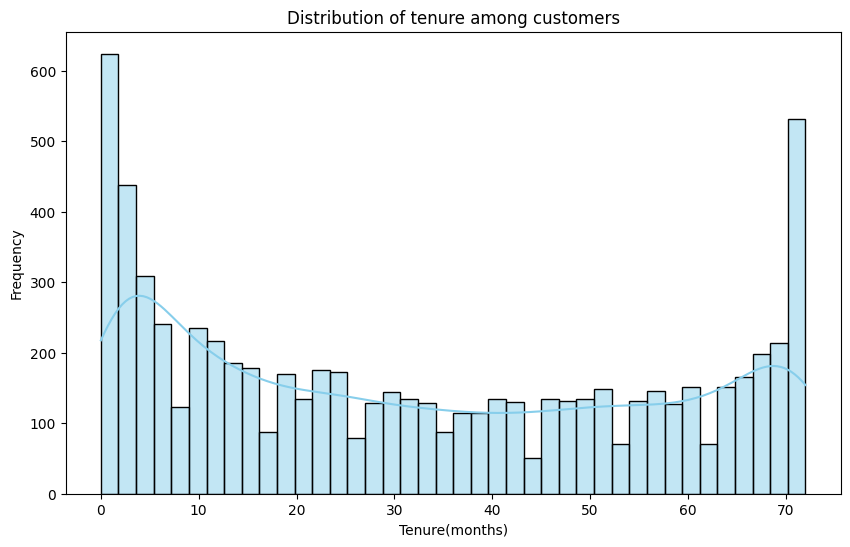

In [ ]:
plt.figure(figsize=(10,6))

sns.histplot(df['tenure'],kde=True,color='skyblue',bins=40)
plt.title('Distribution of tenure among customers')
plt.xlabel('Tenure(months)')
plt.ylabel('Frequency')

The fact that the distribution looks uniform suggests that customers are evenly distributed across different tenure ranges.

This means you have a broad spectrum of customers, from those who have just joined to those who have been with the service for a long time.

In [ ]:
#check for monthlycharge and Totalcharge distribution
# as both features are numeric continue feature so
# visualize through histogram and kde

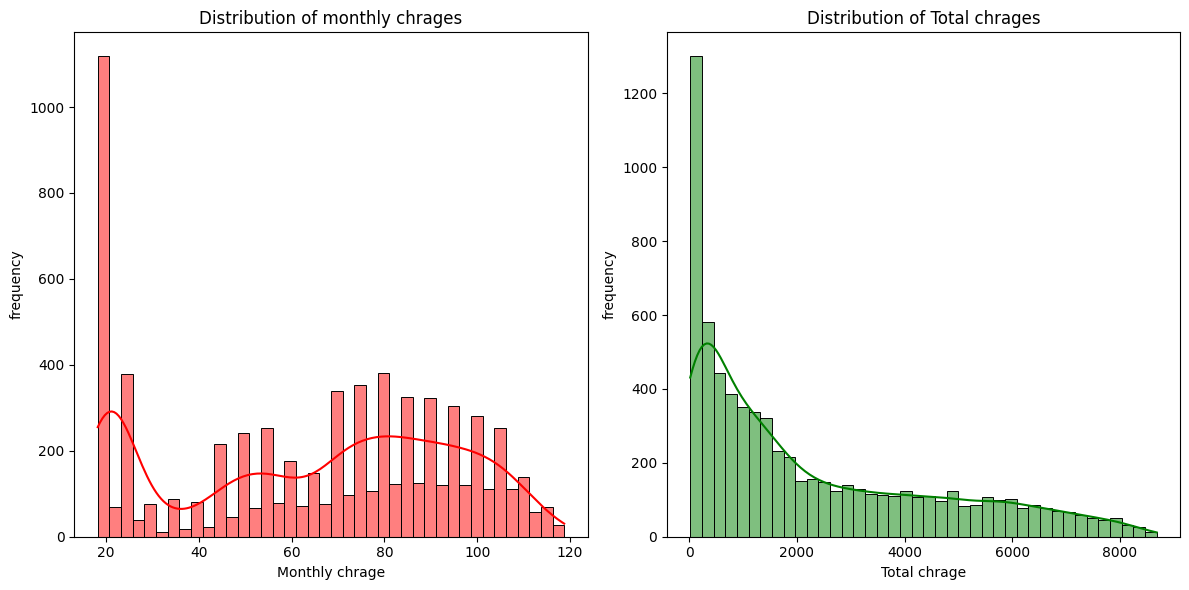

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(df['MonthlyCharges'], kde=True,bins=40,color='red')
plt.title('Distribution of monthly chrages')
plt.xlabel("Monthly chrage")
plt.ylabel('frequency')


plt.subplot(1,2,2)
sns.histplot(df['TotalCharges'], kde=True,bins=40,color='green')
plt.title('Distribution of Total chrages')
plt.xlabel("Total chrage")
plt.ylabel('frequency')


plt.tight_layout()


MonthlyCharges: symmetric distribution,spread across ₹18 to ₹118.

TotalCharges: Right-Skewed,with many low-charge customer (likely newer users or churned customers).

In [ ]:
#check for categories in contract type

In [ ]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
#determine how many customer belongs to that categories

In [ ]:
contracts_count=df['Contract'].value_counts()

In [ ]:
contracts_count

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


<Axes: xlabel='Contract', ylabel='count'>

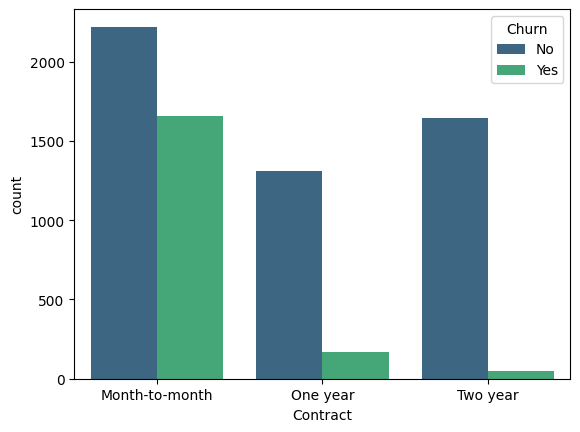

In [ ]:
sns.countplot(x=df['Contract'],hue=df['Churn'],palette='viridis')

Insights:
Majority of customers (~55%) are on a Month-to-Month contract, which is a potential churn risk.


Annual contracts (One-year & Two-year) account for around 45% of customers, indicating higher stability.


Business Implication:
Customers on Month-to-Month contracts may need loyalty discounts or incentives to commit to a longer contract.

Long-term customers should be rewarded with better benefits to maintain retention.

In [ ]:
#lets check for senior citizen

In [ ]:
senior_citizen_count=df['SeniorCitizen'].value_counts()

In [ ]:
senior_citizen_count

,count
SeniorCitizen,
0,5901
1,1142


In [ ]:
senior_citizen_count=df['SeniorCitizen'].sum()

In [ ]:
senior_citizen_count

np.int64(1142)

In [ ]:
len(df)

7043

In [ ]:
total_customer=len(df)

In [ ]:
senior_citizen_percentage=(senior_citizen_count/total_customer)*100

In [ ]:
senior_citizen_percentage

np.float64(16.21468124378816)

Around 16% of customers are Senior Citizens, meaning most customers (about 84%) are non-senior citizens.

Senior Citizens may have different service needs, such as:
Better customer support (e.g., phone assistance instead of digital support).

Discounted plans for retirees.

Simplified billing and payment options.

Business Implication:
A targeted retention strategy for senior citizens could improve customer satisfaction and loyalty.

Promotions tailored for seniors (e.g., "Senior Connect Plan") might increase engagement.

In [ ]:
#customer proportion with and without partner

In [ ]:
partner_counts=df['Partner'].value_counts(normalize=True)*100

In [ ]:
partner_counts

,proportion
Partner,
No,51.69672
Yes,48.30328


Text(0.5, 1.0, 'Proportion of customer with and without partner')

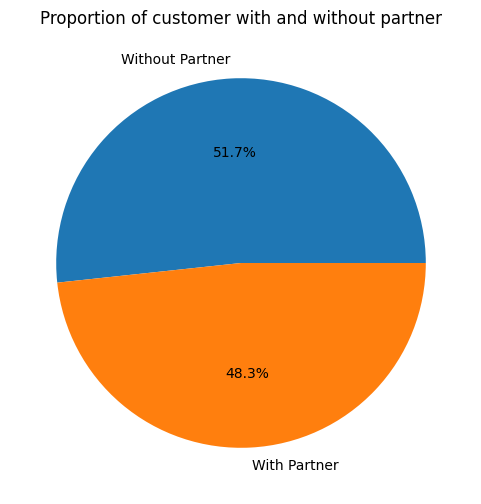

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(partner_counts,
        labels=['Without Partner','With Partner'],
        autopct="%1.1f%%")
plt.title("Proportion of customer with and without partner")

~51.9% of customers do not have a partner, while 48.1% have a partner.

This indicates a fairly balanced distribution, but slightly more single customers.

Business Implication:
Customers without a partner may be more price-sensitive and prefer flexible plans.

Customers with a partner might be interested in family or bundled plans.

Retention strategies could be tailored, such as:
Offering "Family & Partner Plans" to encourage long-term subscriptions.

Discounted multi-line offers to increase loyalty.

In [ ]:
#lets check for internet service customers count

In [ ]:
internet_service_count=df['InternetService'].value_counts()

In [ ]:
internet_service_count

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


Text(0.5, 1.0, 'Internet Service Customers')

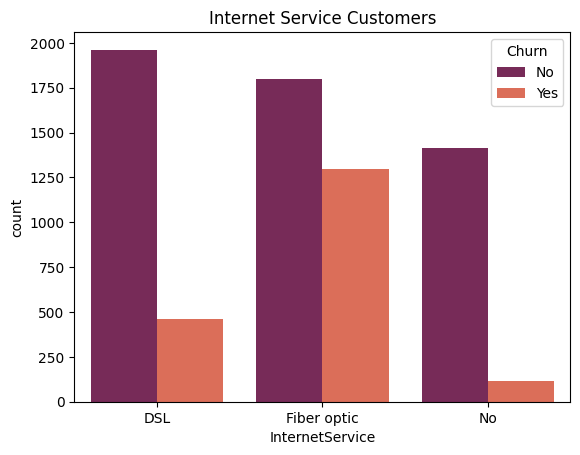

In [ ]:
sns.countplot(data = df, x = 'InternetService', hue= 'Churn',  palette='rocket')
plt.title("Internet Service Customers")

Fiber Optic is the most popular Internet Service, used by ~44% of customers.

DSL is the second most used service (~34%), while ~22% of customers have no internet service.

Business Implications:
Fiber optic users may value high-speed internet and premium services.

DSL users might be price-conscious and could be upgraded to fiber plans.

Customers without internet could be targeted with internet bundles to increase revenue.

In [ ]:
#lets start analysisng churn rates

In [ ]:
churn_rate = df['Churn'].value_counts(normalize=True)*100

In [ ]:
churn_rate

,proportion
Churn,
No,73.463013
Yes,26.536987


Text(0.5, 1.0, 'Proportan of Churn Customers')

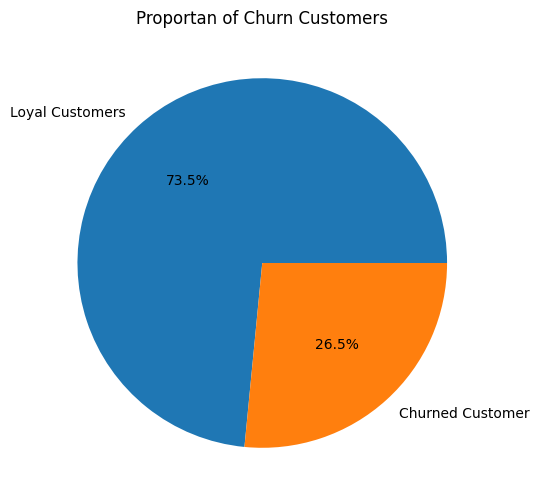

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(churn_rate,
        labels=['Loyal Customers', 'Churned Customer'],
        autopct="%1.1f%%")
plt.title("Proportan of Churn Customers")

In [ ]:
#to analyze how churn varies across different contract types, lest check below

In [ ]:
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()*100

In [ ]:
contract_churn

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


<ipython-input-69-97d9859acfc0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= contract_churn.index, y = contract_churn['Yes'],


([0, 1, 2],
 [Text(0, 0, 'Month-to-month'),
  Text(1, 0, 'One year'),
  Text(2, 0, 'Two year')])

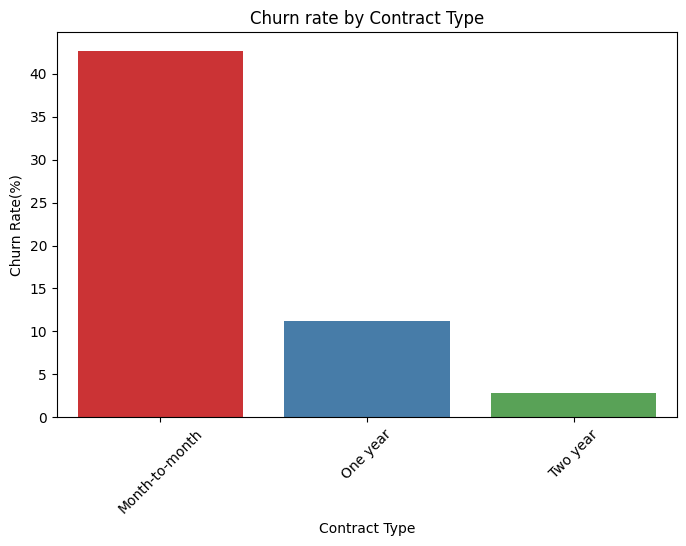

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x= contract_churn.index, y = contract_churn['Yes'],
            palette='Set1')
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate(%)")
plt.title("Churn rate by Contract Type")
plt.xticks(rotation = 45)


Customers on Month-to-Month contracts have the highest churn (~45%), meaning they are most likely to leave.

One-Year contract churn is much lower (~11.5%), showing that longer commitments reduce churn.

Two-Year contract churn is the lowest (~3.4%), indicating that long-term customers are highly loyal.

Business Recommendations:
Encourage Month-to-Month users to switch to long-term contracts by offering discounts or loyalty rewards.

Target high-risk churn customers on Month-to-Month contracts with personalized retention strategies.

Provide better incentives for contract renewals to keep long-term customers engaged.

In [ ]:
# Calculate churn rate for PaperlessBilling
paperless_churn = df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack() * 100

In [ ]:
paperless_churn

Churn,No,Yes
PaperlessBilling,,
No,83.669916,16.330084
Yes,66.434908,33.565092


<ipython-input-72-52d2747f3cbd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=paperless_churn.index, y=paperless_churn['Yes'], palette='Set2')


Text(0.5, 1.0, 'Churn Rate by Paperless Billing Status')

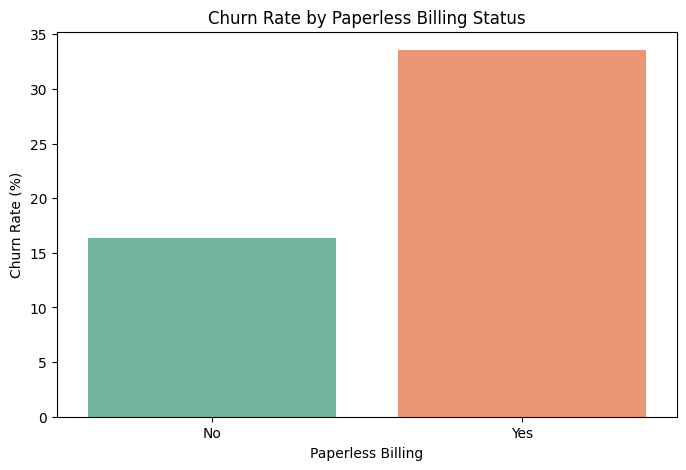

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=paperless_churn.index, y=paperless_churn['Yes'], palette='Set2')
plt.xlabel("Paperless Billing")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Paperless Billing Status")

### **Insights on Paperless Billing & Churn Rate**  

1. **Customers who do not use PaperlessBilling have a much lower churn rate (16.33%)** compared to those who use it (33.57%).  
2. **PaperlessBilling users churn at twice the rate** of those who receive physical bills.  
3. This suggests **a possible dissatisfaction or disengagement with digital billing**.  

### **Possible Reasons for Higher Churn in PaperlessBilling Customers:**  
✅ **Lack of Payment Reminders** – Customers who receive paper bills may have a more structured approach to payments.  
✅ **Technical Issues** – Some customers might face payment failures or delays with PaperlessBilling.  
✅ **Billing Transparency** – Users may find it difficult to track charges or have concerns about unexpected fees.  

### **Business Recommendations:**  
📌 **Enhance Digital Communication** – Send **SMS/email reminders** for upcoming payments.  
📌 **Improve Billing Clarity** – Simplify the **online bill format** to reduce confusion.  
📌 **Offer Incentives** – Provide **discounts or rewards** for PaperlessBilling users who stay subscribed for longer periods.  
📌 **Better Customer Support** – Address concerns about **failed payments or hidden charges** that might be driving churn.

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Calculate churn rate by gender
gender_churn = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack() * 100


In [ ]:
# Display churn rates
print(gender_churn)

Churn          No        Yes
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338


<ipython-input-76-c385458b1513>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_churn.index, y=gender_churn['Yes'], palette='rocket')


([0, 1], [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

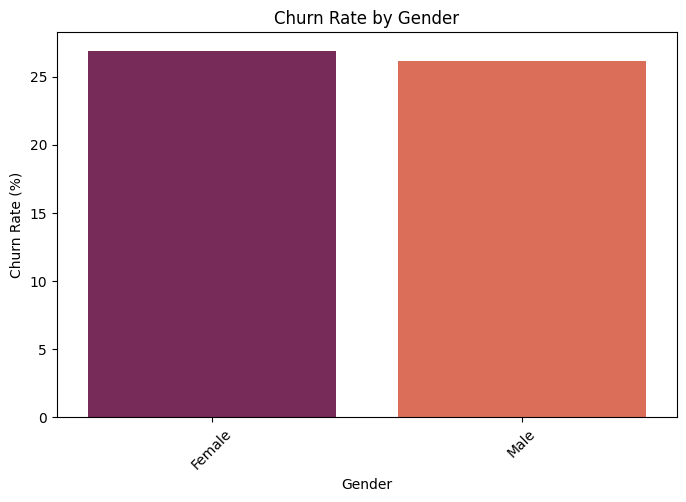

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=gender_churn.index, y=gender_churn['Yes'], palette='rocket')
plt.xlabel("Gender")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Gender")
plt.xticks(rotation=45)

Insights:
Male and female customers have almost identical churn rates (~26.6% - 26.7%).

Gender does not significantly influence churn; instead, other factors like contract type, tenure, or billing method are more impactful.

Business Focus: Instead of targeting gender-based retention strategies, focus on contract plans, customer support, and pricing strategies to reduce churn.

In [ ]:
df['New_Churn'] = df['Churn'].replace({"Yes":1, 'No':0})

<ipython-input-77-eb64cda8ee18>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['New_Churn'] = df['Churn'].replace({"Yes":1, 'No':0})


In [ ]:
correlationi_matrix = df[['MonthlyCharges', 'TotalCharges', 'New_Churn']].corr()

In [ ]:
correlationi_matrix

,MonthlyCharges,TotalCharges,New_Churn
MonthlyCharges,1.000000,0.650864,0.193356
TotalCharges,0.650864,1.000000,-0.199037
New_Churn,0.193356,-0.199037,1.000000


<Axes: >

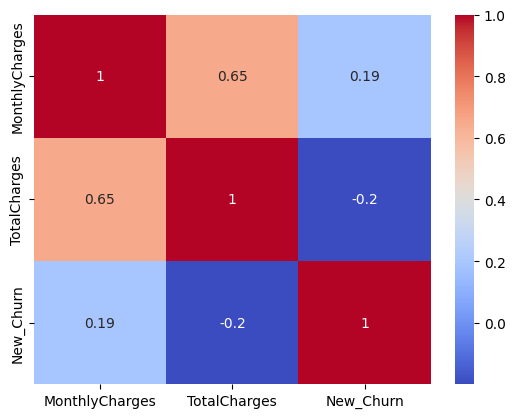

In [ ]:
sns.heatmap(correlationi_matrix,annot=True, cmap="coolwarm")

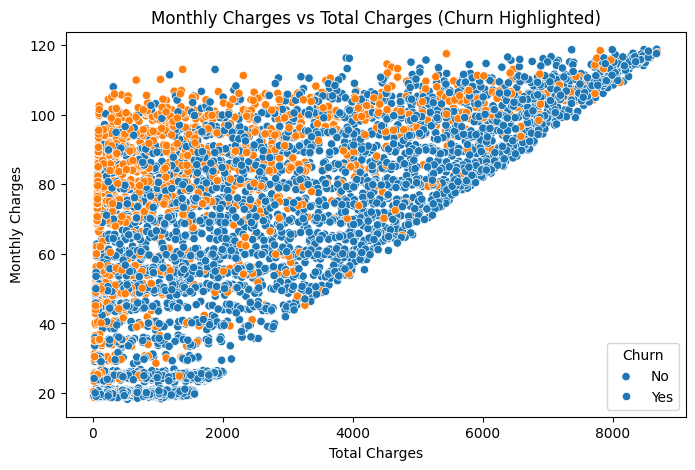

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn')
plt.title("Monthly Charges vs Total Charges (Churn Highlighted)")
plt.xlabel("Total Charges")
plt.ylabel("Monthly Charges")
plt.legend(title="Churn", labels=["No", "Yes"])

Insights:
📌 MonthlyCharges have a positive correlation with churn (0.193) → Customers with higher MonthlyCharges are more likely to churn.
📌 TotalCharges have a slight negative correlation with churn (-0.199) → Long-term customers (higher TotalCharges) churn less.
📌 Customers paying high MonthlyCharges but having low TotalCharges churn more → New customers with high bills may feel dissatisfied and leave early.

Business Recommendations:
✅ Lower MonthlyCharges for new customers or provide discounted long-term plans.
✅ Improve customer experience for high-paying new users, as they are at high churn risk.
✅ Offer loyalty incentives for long-term customers to maintain engagement.

In [ ]:
#calculate average tenure for churned and non churned

In [ ]:
avg_tenure=df.groupby("Churn")['tenure'].mean()

In [ ]:
avg_tenure

,tenure
Churn,
No,37.569965
Yes,17.979133


<ipython-input-85-2bc547b0d5e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_tenure.index,y=avg_tenure.values,palette='rocket')


Text(0.5, 1.0, 'Average tenure of churned')

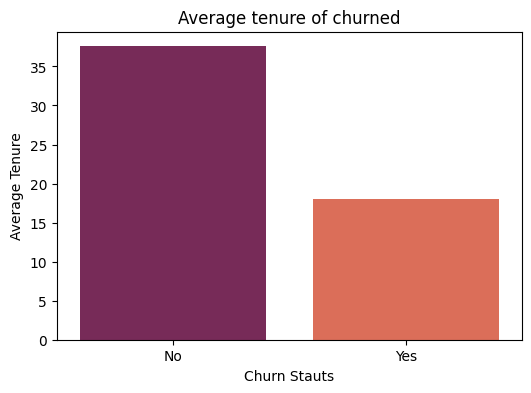

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=avg_tenure.index,y=avg_tenure.values,palette='rocket')
plt.ylabel("Average Tenure")
plt.xlabel("Churn Stauts")
plt.title("Average tenure of churned")

Insights:
📌 Churned customers have a significantly lower average tenure (~18 months)  compared to non-churned customers (~38 months).


📌 This suggests that customers are more likely to churn early in their subscription, especially within the first 1–2 years.

📌 Customer retention strategies should focus on the first 12-18 months, offering better onboarding, personalized offers, or loyalty rewards.



In [ ]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,New_Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0


In [ ]:
#Visualize the customer with techsupport

In [ ]:
df.groupby('TechSupport')['Churn'].value_counts().unstack()

Churn,No,Yes
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


In [ ]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
pd.crosstab(df['TechSupport'],df['Churn'])

Churn,No,Yes
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


Text(0.5, 1.0, 'Churn rate by Tech Support')

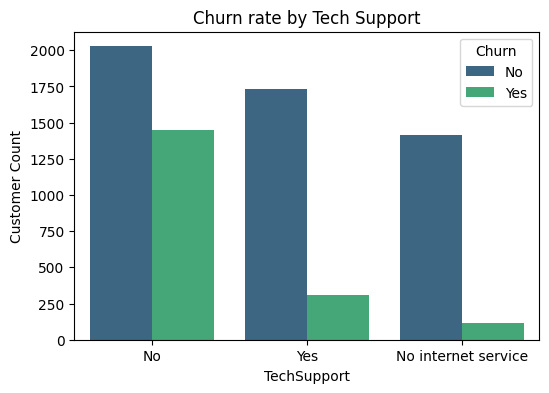

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='TechSupport',hue='Churn',data=df,
              palette='viridis')
plt.xlabel('TechSupport')
plt.ylabel('Customer Count')
plt.title('Churn rate by Tech Support')

In [ ]:
df.groupby('TechSupport')['Churn'].value_counts(normalize=True).unstack()*100


Churn,No,Yes
TechSupport,,
No,58.364526,41.635474
No internet service,92.595020,7.404980
Yes,84.833659,15.166341


Customers without Tech Support have the highest churn rate (almost 42%).

Customers with Tech Support churn significantly less (around 15%).

Customers with "No Internet Service" churn the least, since they are not using internet services actively.

In [ ]:
StreamingTv_churn = df.groupby('StreamingTV')['Churn'].value_counts(normalize=True).unstack()*100

In [ ]:
StreamingTv_churn

Churn,No,Yes
StreamingTV,,
No,66.476868,33.523132
No internet service,92.595020,7.404980
Yes,69.929812,30.070188


In [ ]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
StreamingMovie_churn = df.groupby('StreamingMovies')['Churn'].value_counts(normalize=True).unstack()*100

In [ ]:
StreamingMovie_churn

Churn,No,Yes
StreamingMovies,,
No,66.319569,33.680431
No internet service,92.595020,7.404980
Yes,70.058565,29.941435


Text(0.5, 1.0, 'Churn distribution for StreamingMovies')

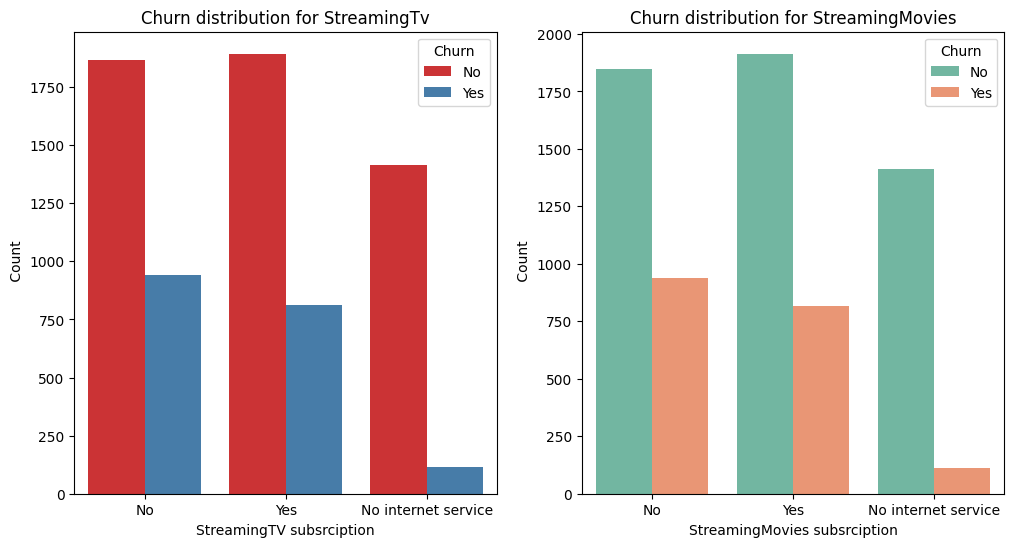

In [ ]:
plt.figure(figsize=(12,6))

#Subplot 1:StreamingTV vs Churn
plt.subplot(1,2,1)
sns.countplot(x='StreamingTV',hue='Churn',data=df,
              palette='Set1')
plt.xlabel('StreamingTV subsrciption')
plt.ylabel(' Count')
plt.title('Churn distribution for StreamingTv')

#Subplot 2:StreamingTV vs Churn
plt.subplot(1,2,2)
sns.countplot(x='StreamingMovies',hue='Churn',data=df,
              palette='Set2')
plt.xlabel('StreamingMovies subsrciption')
plt.ylabel(' Count')
plt.title('Churn distribution for StreamingMovies')


Higher Churn for StreamingTV & StreamingMovies users:

Customers with "Yes" for StreamingTV/StreamingMovies churn more than those with "No."
This may be due to higher MonthlyCharges, leading to higher dissatisfaction.


Lower Churn for "No internet service" customers:

These users churn the least, likely because they have limited services and may have lower bills.

Possible Business Action:

Offer discounts or bundled packages for customers using StreamingTV and StreamingMovies.
Improve service experience to retain them.

In [ ]:
multiple_line_churn = df.groupby('MultipleLines')['Churn'].value_counts().unstack()*100

In [ ]:
multiple_line_churn

Churn,No,Yes
MultipleLines,,
No,254100,84900
No phone service,51200,17000
Yes,212100,85000


Text(0.5, 1.0, 'Churn distribution for Multiplelines')

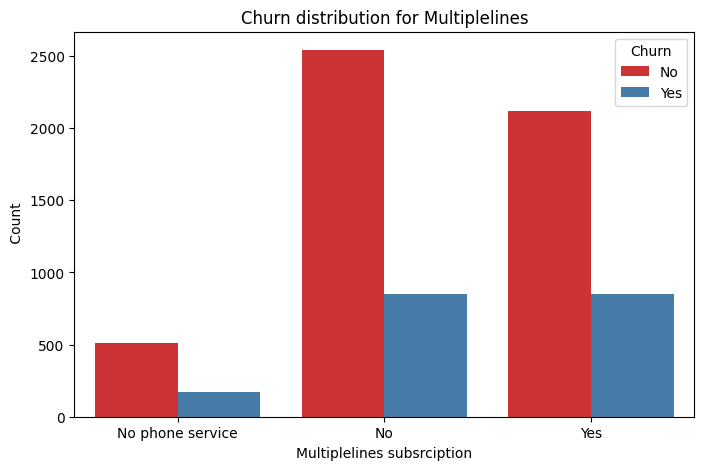

In [ ]:
plt.figure(figsize=(8,5))

sns.countplot(x='MultipleLines',hue='Churn',data=df,
              palette='Set1')
plt.xlabel('Multiplelines subsrciption')
plt.ylabel(' Count')
plt.title('Churn distribution for Multiplelines')

Customers with MultipleLines (85,000 churned) have slightly higher churn than those without MultipleLines (84,900 churned).


Customers with No Phone Service (17,000 churned) churn the least.


This suggests that having MultipleLines does not significantly impact churn, but those with additional lines may still be at risk.


📌 Suggested Actions:
Offer better pricing bundles for MultipleLines users.

Investigate service quality issues affecting retention.

Provide personalized retention offers to customers using MultipleLines.

In [ ]:
#for payment  methods

In [ ]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
payment_churn=df.groupby('PaymentMethod')['Churn'].value_counts().unstack()

In [ ]:
payment_churn

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

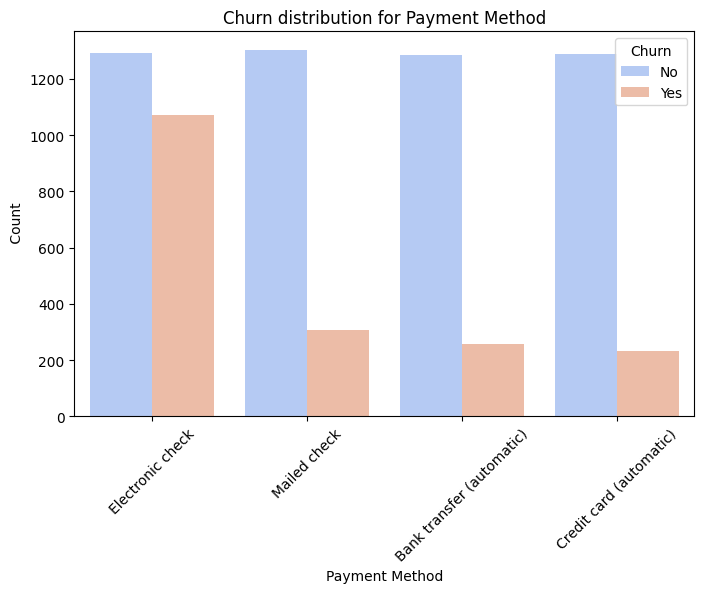

In [ ]:
plt.figure(figsize=(8,5))

sns.countplot(x='PaymentMethod',hue='Churn',data=df,
              palette='coolwarm')
plt.xlabel('Payment Method')
plt.ylabel(' Count')
plt.title('Churn distribution for Payment Method')
plt.xticks(rotation=45)

In [ ]:
payment_churn_percentage=df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()*100

In [ ]:
payment_churn_percentage

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


Insights & Business Actions:
Customers using "Electronic Check" have the highest churn rate (45.29%), meaning they are the most at risk of leaving.

 Automatic payment methods (Bank Transfer & Credit Card) have the lowest churn rates (~15-17%), showing more stable retention.

Mailed Check users also experience relatively higher churn (19.11%) compared to automatic methods.



📌 Suggested Actions:
Encourage customers to switch to automatic payment methods by offering discounts or loyalty rewards.


Investigate why Electronic Check users are churning so frequently—is it due to payment failures, delays, or dissatisfaction?


Offer reminders and incentives for manual payment users (Mailed Check) to switch to more reliable methods.

In [ ]:
Dependency_churn_percentage=df.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack()*100

In [ ]:
Dependency_churn_percentage

Churn,No,Yes
Dependents,,
No,68.720860,31.279140
Yes,84.549763,15.450237


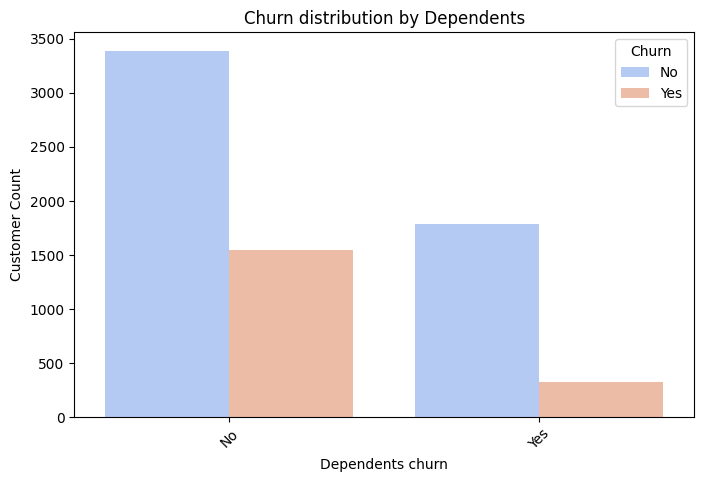

In [ ]:
plt.figure(figsize=(8,5))

sns.countplot(x='Dependents',hue='Churn',data=df,
              palette='coolwarm')
plt.xlabel('Dependents churn')
plt.ylabel('Customer Count')
plt.title('Churn distribution by Dependents')
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=["No", "Yes"])

Customers without dependents have 1,543 churned cases, which is significantly higher than those with dependents (only 326 churned cases).


This suggests that customers with dependents are less likely to churn.


The churn ratio is noticeably lower for those who have dependents.

In [ ]:
Senior_churn_percentage=df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()*100

In [ ]:
Senior_churn_percentage

Churn,No,Yes
SeniorCitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


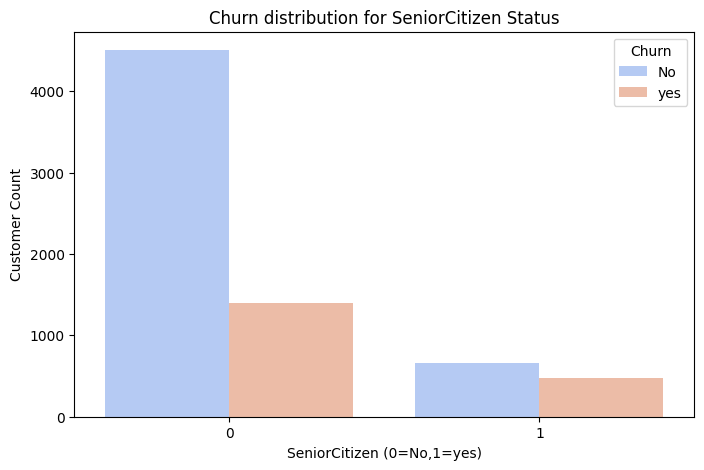

In [ ]:
plt.figure(figsize=(8,5))

sns.countplot(x='SeniorCitizen',hue='Churn',data=df,
              palette='coolwarm')
plt.xlabel('SeniorCitizen (0=No,1=yes)')
plt.ylabel('Customer Count')
plt.title('Churn distribution for SeniorCitizen Status')
plt.legend(title='Churn',labels=["No","yes"])


Non-Senior Customers (SeniorCitizen = 0)

Stayed (No Churn): 4,508 customers
Churned (Yes): 1,393 customers

Observation: The majority of non-senior customers have stayed, but 1,393 have churned, indicating potential dissatisfaction in some areas.


Senior Customers (SeniorCitizen = 1)

Stayed (No Churn): 666 customers
Churned (Yes): 476 customers

Observation: The number of senior customers is much lower, but their churn rate seems comparatively higher.

##Correlation & Relationships

In [ ]:
#to analyze how different numerical feature are correlated ,
#lets find correlation matrix

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df_numerical=df[['tenure','MonthlyCharges','TotalCharges']]

In [ ]:
df_numerical.head(2)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50


In [ ]:
corr_matrix=df_numerical.corr()

In [ ]:
corr_matrix

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825464
MonthlyCharges,0.247900,1.000000,0.650864
TotalCharges,0.825464,0.650864,1.000000


Text(0.5, 1.0, 'Correlation Matrix of Numerical Feature')

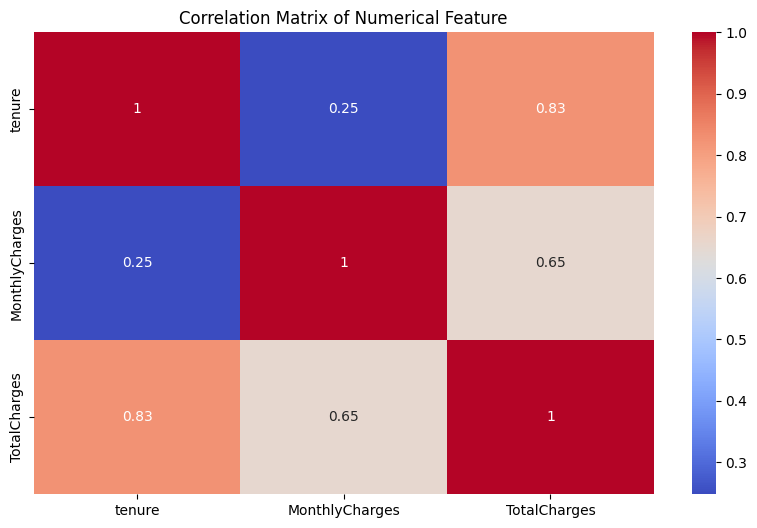

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Feature')

Insights from Correlation Analysis


TotalCharges is highly correlated with Tenure (0.8255)

This makes sense because TotalCharges = MonthlyCharges × Tenure (approximately).

Long-term customers naturally accumulate higher TotalCharges.

MonthlyCharges has a moderate correlation with TotalCharges (0.6509)

Customers with higher MonthlyCharges tend to accumulate more TotalCharges, but tenure also affects TotalCharges significantly.


Tenure has a weak correlation with MonthlyCharges (0.2479)

While tenure affects TotalCharges, it doesn’t have a strong relationship with MonthlyCharges.

This suggests that customers do not necessarily increase their MonthlyCharges over time.

From the correlation matrix you provided, it looks like TotalCharges and Tenure have the highest correlation (0.825), which makes sense because the longer a customer stays, the more they pay in total.

However, if we are looking for the feature with the highest correlation with churn, we need the correlation of the Churn column with numerical features.

In [ ]:
df_numerical_with_churn=df[['tenure','MonthlyCharges','TotalCharges','New_Churn']]

In [ ]:
corr_matrix_with_churn=df_numerical_with_churn.corr()

In [ ]:
corr_matrix_with_churn

,tenure,MonthlyCharges,TotalCharges,New_Churn
tenure,1.000000,0.247900,0.825464,-0.352229
MonthlyCharges,0.247900,1.000000,0.650864,0.193356
TotalCharges,0.825464,0.650864,1.000000,-0.199037
New_Churn,-0.352229,0.193356,-0.199037,1.000000


Text(0.5, 1.0, 'Correlation Matrix of Numerical Feature with churn')

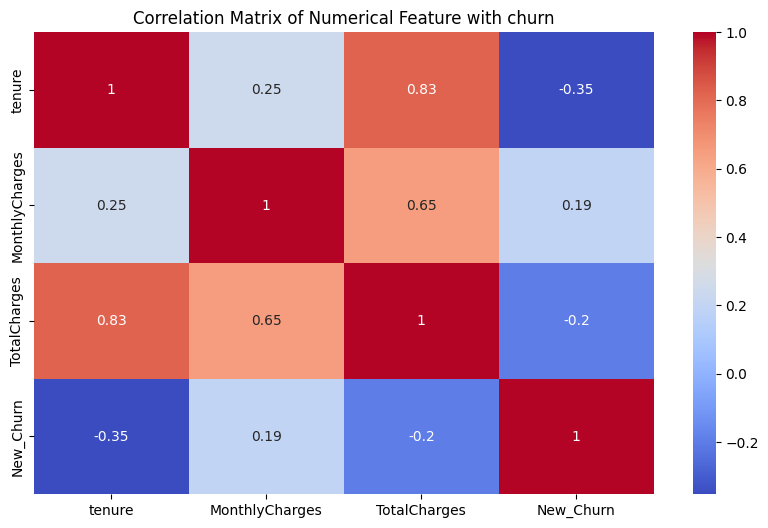

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix_with_churn,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Feature with churn")

Tenure (-0.35): Higher tenure customers are less likely to churn. This negative correlation suggests that customers who have stayed longer are more loyal and less likely to leave.


MonthlyCharges (0.19): Customers with higher monthly charges tend to churn more, but the relationship is weaker.

TotalCharges (-0.19): Similar to tenure, customers with higher total charges are less likely to churn, which makes sense as it accumulates over a longer period.

Since TotalCharges = MonthlyCharges × tenure (approximately), it makes sense that customers who stay longer (higher tenure) will have higher total charges.


This means tenure is a strong indicator of customer lifetime value (CLV)—longer-tenured customers contribute more revenue over time.

In [ ]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,New_Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0


In [ ]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

<ipython-input-128-48897da2dca5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['InternetService'],y=df['MonthlyCharges'],palette='Set2')


Text(0, 0.5, 'Monthly charges')

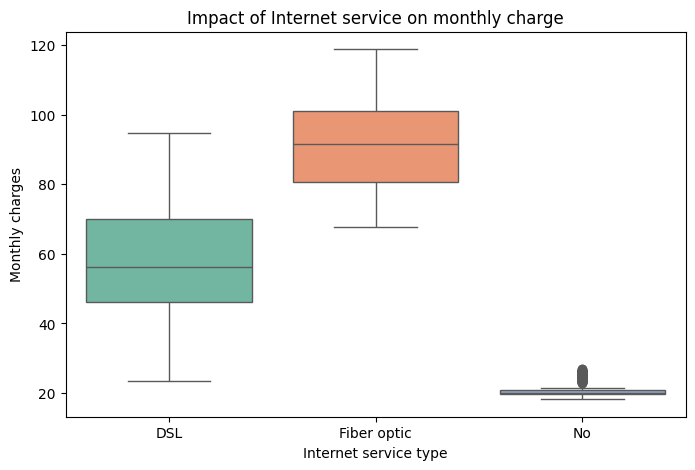

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['InternetService'],y=df['MonthlyCharges'],palette='Set2')
plt.title('Impact of Internet service on monthly charge')
plt.xlabel('Internet service type')
plt.ylabel('Monthly charges')

<ipython-input-129-35664a48c29b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[df['InternetService']=='No']['MonthlyCharges'],palette='Set2')


Text(0, 0.5, 'Monthly charges')

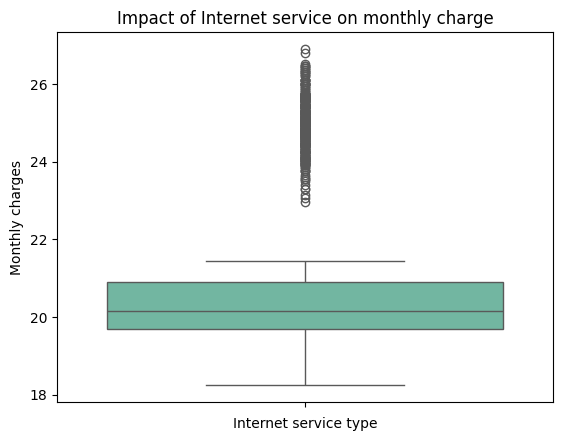

In [ ]:
sns.boxplot(y=df[df['InternetService']=='No']['MonthlyCharges'],palette='Set2')
plt.title('Impact of Internet service on monthly charge')
plt.xlabel('Internet service type')
plt.ylabel('Monthly charges')


Customers with Fiber optic service tend to have higher MonthlyCharges compared to DSL or No Internet service.

No Internet service results in the lowest MonthlyCharges since it excludes broadband fees.


DSL is generally cheaper than Fiber Optic but more expensive than No Internet Service.

<ipython-input-130-d36c438ca5c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['PaperlessBilling'],y=df['MonthlyCharges'],palette='Set2')


Text(0, 0.5, 'Monthly charges')

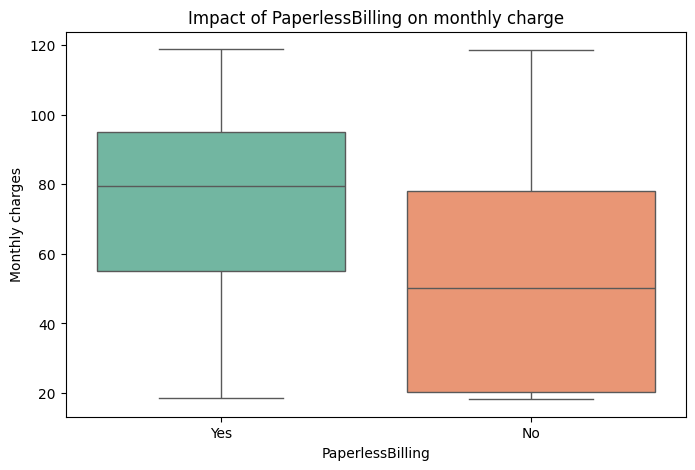

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['PaperlessBilling'],y=df['MonthlyCharges'],palette='Set2')
plt.title('Impact of PaperlessBilling on monthly charge')
plt.xlabel('PaperlessBilling')
plt.ylabel('Monthly charges')

Since the median Monthly charges for Yes is higher than NO. it indicates that customer who get paperless billing tend to pay higher monthly charges

Yes, customers with a longer tenure tend to pay more in TotalCharges. This is evident from the strong positive correlation (0.825) between tenure and TotalCharges.


Why Does This Happen?
Accumulated Payments Over Time

Since TotalCharges is a cumulative value, customers who stay longer naturally pay more.
Loyal Customers May Upgrade Services

Long-term customers might opt for higher-tier plans, increasing their TotalCharges over time.
Promotional Discounts for New Customers

Newer customers might have lower TotalCharges due to initial discounts or trial periods.

In [ ]:
#lets check PaymentMethod affect MonthlyCharges

<ipython-input-132-2f0a07eabe9e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['PaymentMethod'],y=df['MonthlyCharges'],palette='Set2')


([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

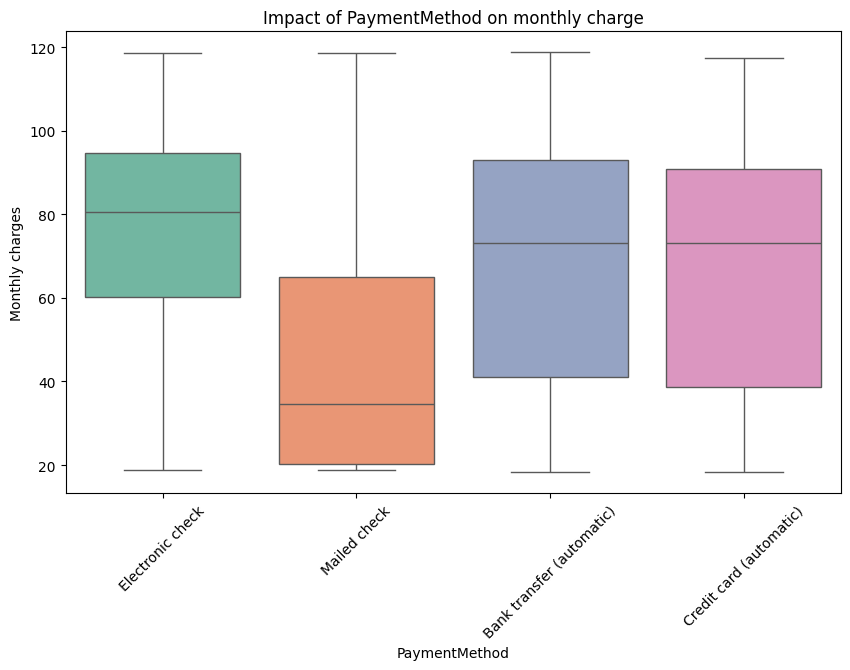

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['PaymentMethod'],y=df['MonthlyCharges'],palette='Set2')
plt.title('Impact of PaymentMethod on monthly charge')
plt.xlabel('PaymentMethod')
plt.ylabel('Monthly charges')
plt.xticks(rotation=45)

Yes, PaymentMethod does affect MonthlyCharges. Some payment methods are associated with higher MonthlyCharges than others.

 Typically, customers using Electronic Check tend to have higher MonthlyCharges, while those using Bank Transfer or Credit Card (automatic payments) tend to have lower MonthlyCharges on average.


Electronic Check Users Might Be Month-to-Month Customers
They often have shorter tenures, leading to higher per-month charges (since long-term plans may offer discounts).


Automatic Payment Users (Credit Card/Bank Transfer) Might Opt for Longer Contracts
These customers are likely on longer contracts, leading to lower average MonthlyCharges due to discounts.


Text(0, 0.5, 'TotalCharges')

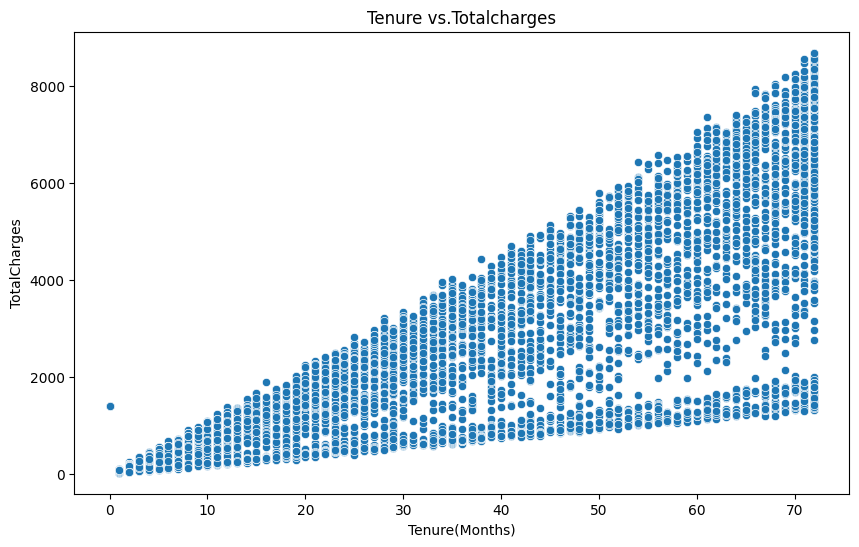

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='tenure',y='TotalCharges',)
plt.title("Tenure vs.Totalcharges")
plt.xlabel("Tenure(Months)")
plt.ylabel("TotalCharges")

1 -Customers with No Internet Service or Minimal Services

These customers may only have a basic phone line, which has a low monthly cost.


2- Billing Issues or Discounts

Some customers might have billing adjustments, discounts, or promotions reducing their TotalCharges.


3-Technical Data Entry Errors

There could be incorrect entries where TotalCharges weren’t updated properly.


4-Service Downgrades

A customer might have started with a higher package but later downgraded to a cheaper plan.

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'New_Churn'],
      dtype='object')

In [ ]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
common_profile=df.groupby(['gender','Contract','InternetService']).size().reset_index(name='Count')

In [ ]:
common_profile

,gender,Contract,InternetService,Count
0,Female,Month-to-month,DSL,602
1,Female,Month-to-month,Fiber optic,1067
2,Female,Month-to-month,No,256
3,Female,One year,DSL,278
4,Female,One year,Fiber optic,273
5,Female,One year,No,167
6,Female,Two year,DSL,308
7,Female,Two year,Fiber optic,213
8,Female,Two year,No,324
9,Male,Month-to-month,DSL,621


In [ ]:
top_3_profile=common_profile.sort_values(by='Count',ascending=False)

In [ ]:
top_3_profile

,gender,Contract,InternetService,Count
1,Female,Month-to-month,Fiber optic,1067
10,Male,Month-to-month,Fiber optic,1061
9,Male,Month-to-month,DSL,621
0,Female,Month-to-month,DSL,602
8,Female,Two year,No,324
15,Male,Two year,DSL,320
17,Male,Two year,No,314
6,Female,Two year,DSL,308
12,Male,One year,DSL,292
3,Female,One year,DSL,278


In [ ]:
top_3_profile.head(3)

,gender,Contract,InternetService,Count
1,Female,Month-to-month,Fiber optic,1067
10,Male,Month-to-month,Fiber optic,1061
9,Male,Month-to-month,DSL,621


Based on your data, the most common customer profiles are:

- Female customers with a month-to-month contract and fiber optic internet – 1,067 customers.

- Male customers with a month-to-month contract and fiber optic internet – 1,061 customers.

- Male customers with a month-to-month contract and DSL internet – 621 customers.

In [ ]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


<ipython-input-144-6606d749d31d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Contract',palette="viridis")


Text(0, 0.5, 'Number of Customers')

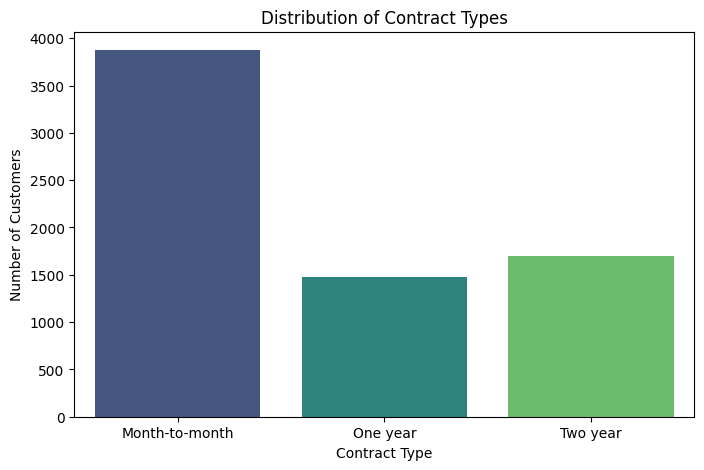

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Contract',palette="viridis")

plt.title("Distribution of Contract Types")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")

The most common contract type among customers is Month-to-month.

Why is Month-to-Month the Most Common?

- Flexibility – Customers prefer not to commit long-term.

- Easier to Cancel – No long-term obligations mean they can switch providers easily.

- Higher Churn Risk – Since there’s no long-term commitment, these customers are more likely to churn.

In [ ]:
internet_service_charges=df.groupby('InternetService')['MonthlyCharges'].mean()

In [ ]:
internet_service_charges

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


<ipython-input-147-22b261ad3ff0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='InternetService',y='MonthlyCharges',palette='viridis')


Text(0, 0.5, 'MonthlyCharges')

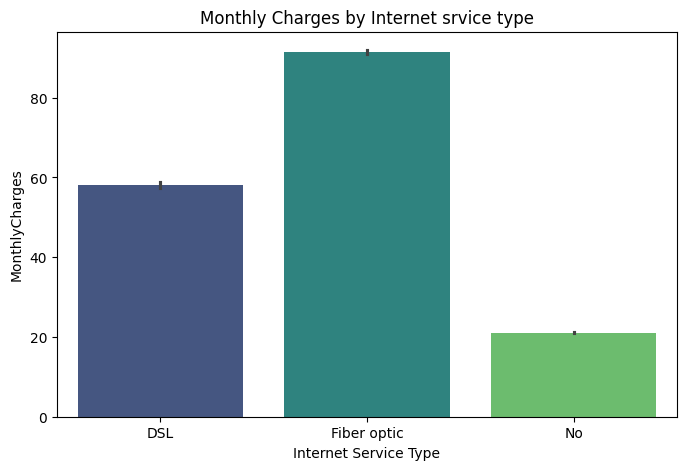

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='InternetService',y='MonthlyCharges',palette='viridis')
plt.title("Monthly Charges by Internet srvice type")
plt.xlabel("Internet Service Type")
plt.ylabel("MonthlyCharges")

Fiber optic users pay the highest (~91.50/month).

DSL users pay moderately (~58.10/month).


Customers without internet pay significantly less (~21.08/month).

In [ ]:
online_back_dev_prot = df.groupby(['OnlineBackup', 'DeviceProtection'])['Churn'].value_counts().unstack()

In [ ]:
online_back_dev_prot

Churn                                      No  Yes
OnlineBackup        DeviceProtection              
No                  No                   1073  911
                    Yes                   782  322
No internet service No internet service  1413  113
Yes                 No                    811  300
                    Yes                  1095  223

 Customers with No OnlineBackup and No DeviceProtection have high churn (911 out of 1984 customers churned).

- Those who have both OnlineBackup and DeviceProtection churn less (only 223 out of 1318 churned).

- Customers with no internet service have the lowest churn (113 out of 1526).

In [ ]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

<ipython-input-151-99599c84b85d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='Partner',y='tenure',palette='Set1')
<ipython-input-151-99599c84b85d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='Dependents',y='tenure',palette='Set2')


Text(0, 0.5, 'tenure')

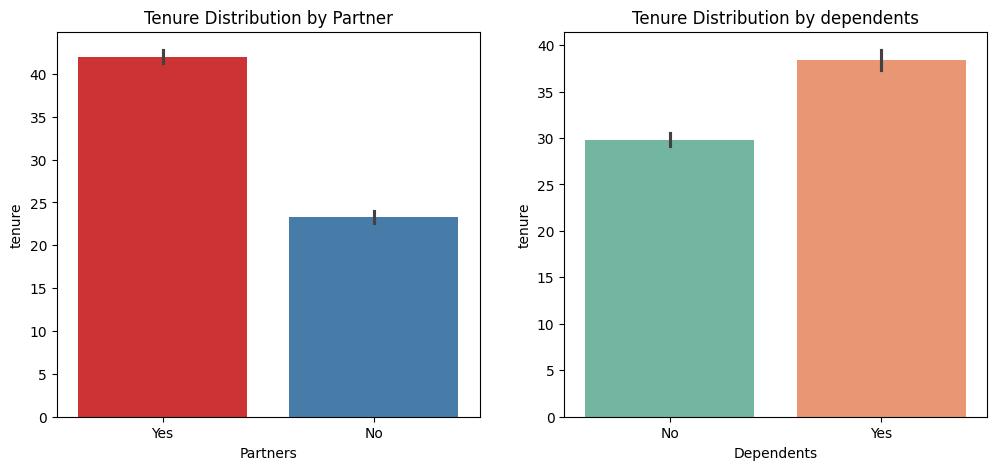

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(data=df,x='Partner',y='tenure',palette='Set1')
plt.title("Tenure Distribution by Partner")
plt.xlabel("Partners")
plt.ylabel("tenure")

plt.subplot(1,2,2)
sns.barplot(data=df,x='Dependents',y='tenure',palette='Set2')
plt.title("Tenure Distribution by dependents")
plt.xlabel("Dependents")
plt.ylabel("tenure")

In [ ]:
avg_tenure_by_part=df.groupby('Partner')['tenure'].mean()

In [ ]:
avg_tenure_by_part

,tenure
Partner,
No,23.357869
Yes,42.017637


In [ ]:
avg_tenure_by_dep=df.groupby('Dependents')['tenure'].mean()

In [ ]:
avg_tenure_by_dep

,tenure
Dependents,
No,29.806000
Yes,38.368246


In [ ]:
avg_tenure_by_Dep_part=df.groupby(['Partner','Dependents'])['tenure'].mean().reset_index()

In [ ]:
avg_tenure_by_Dep_part

,Partner,Dependents,tenure
0,No,No,23.303354
1,No,Yes,23.853186
2,Yes,No,42.709014
3,Yes,Yes,41.364208


<Axes: xlabel='Partner', ylabel='tenure'>

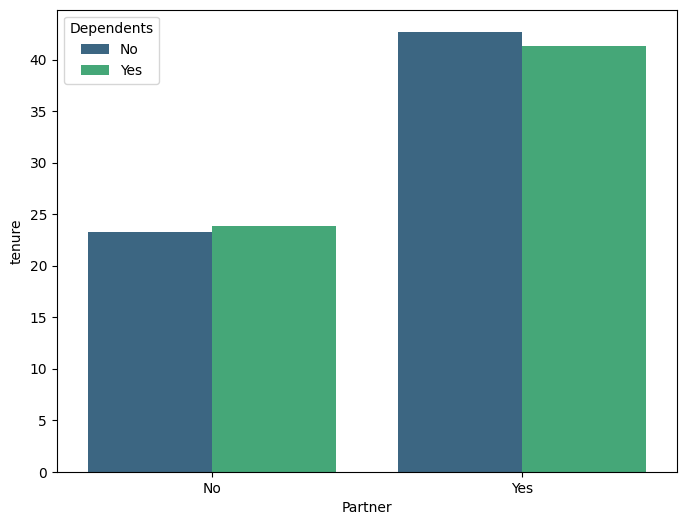

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=avg_tenure_by_Dep_part,x='Partner',y='tenure',hue='Dependents',palette='viridis')

Customers with No Partner & No Dependents have the lowest average tenure (23.30 months).

Customers with No Partner but with Dependents have a slightly higher tenure (23.85 months).

Customers with a Partner but No Dependents have a significantly higher tenure (42.71 months).

Customers with both Partner & Dependents have a slightly lower tenure than the previous group but still high (41.36 months).

In [ ]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
contract_monthly_charge=df.groupby('Contract')['MonthlyCharges'].mean()

In [ ]:
contract_monthly_charge

,MonthlyCharges
Contract,
Month-to-month,66.398490
One year,65.048608
Two year,60.770413


<ipython-input-162-01d66c334680>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contract_monthly_charge.index,y=contract_monthly_charge.values,palette='viridis')


Text(0, 0.5, 'Monthlycharges')

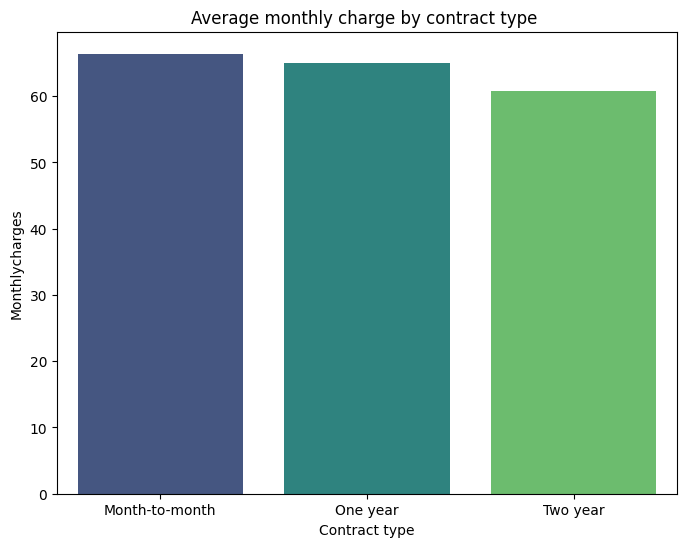

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=contract_monthly_charge.index,y=contract_monthly_charge.values,palette='viridis')
plt.title("Average monthly charge by contract type ")
plt.xlabel("Contract type")
plt.ylabel("Monthlycharges")

Insights
-
Yes, Month to month customers pay the highest monthly charges average - ~66.40

- Discount might apply for one year and two year - so charges for one year  is ~ 65 & for two year ~ 60

In [ ]:
streaming_charges=df.groupby(['StreamingTV','StreamingMovies'])['MonthlyCharges'].mean().reset_index()


In [ ]:
streaming_charges

,StreamingTV,StreamingMovies,MonthlyCharges
0,No,No,60.904113
1,No,Yes,76.811742
2,No internet service,No internet service,21.079194
3,Yes,No,77.352803
4,Yes,Yes,93.237500


Text(0, 0.5, 'Average Monthly Charges')

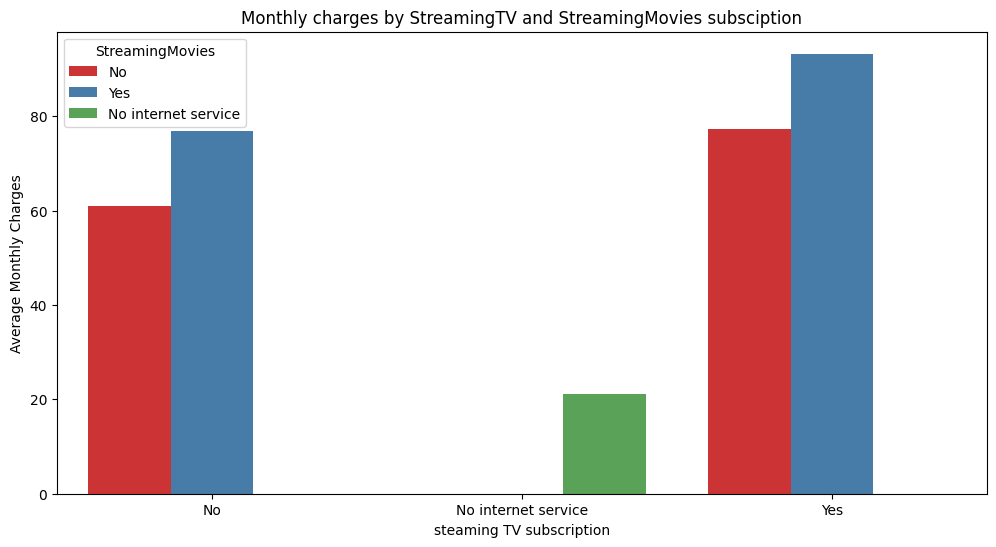

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=streaming_charges,x='StreamingTV',y='MonthlyCharges',hue='StreamingMovies',palette='Set1')
plt.title("Monthly charges by StreamingTV and StreamingMovies subsciption")
plt.xlabel("steaming TV subscription")
plt.ylabel("Average Monthly Charges")

Key Insights:

Customers with both StreamingTV & StreamingMovies pay the most (~₹93.23).

StreamingTV only (₹77.35) and StreamingMovies only (₹76.81) are similarly priced.

Customers with neither pay less (~₹60.90).

Customers with "No internet service" pay the least (~₹21.08),
which makes sense as streaming requires the internet.

In [ ]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,New_Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0


In [ ]:
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [ ]:
df['TotalCharges'].describe()

,TotalCharges
count,7043.000000
mean,2281.916928
std,2265.270398
min,18.800000
25%,402.225000
50%,1397.475000
75%,3786.600000
max,8684.800000


In [ ]:
df['tenure'].describe()

,tenure
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [ ]:
df['TenureSegment']=pd.cut(df['tenure'],
                           bins=[0,12,48,72],labels=['New','Mid-term','Long-term'])

In [ ]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,New_Churn,TenureSegment
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,New


In [ ]:
df['TenureSegment'].unique()

['New', 'Mid-term', 'Long-term', NaN]
Categories (3, object): ['New' < 'Mid-term' < 'Long-term']

In [ ]:
df['TenureSegment'].value_counts()

,count
TenureSegment,
Mid-term,2618
Long-term,2239
New,2175


In [ ]:
#tenure vs totalcharges

In [ ]:
total_charge_by_seg=df.groupby('TenureSegment')['TotalCharges'].mean()

<ipython-input-175-cac353d8e13b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_charge_by_seg=df.groupby('TenureSegment')['TotalCharges'].mean()


In [ ]:
total_charge_by_seg

,TotalCharges
TenureSegment,
New,276.621563
Mid-term,1895.977101
Long-term,4685.506364


<ipython-input-177-d185efd1f68e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_charge_by_seg.index,y=total_charge_by_seg.values,


Text(0, 0.5, 'Average Total Charges')

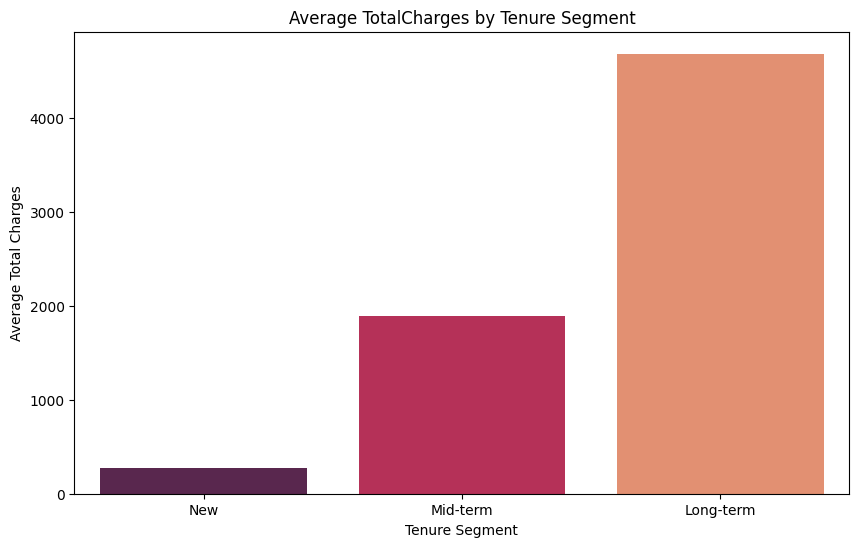

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=total_charge_by_seg.index,y=total_charge_by_seg.values,
            palette='rocket')
plt.title("Average TotalCharges by Tenure Segment")
plt.xlabel("Tenure Segment")
plt.ylabel("Average Total Charges")

#Insights -

- As per the range for Monthly Charges and Total Charges not able to segmented.

- So for tenure sengentation -  
- New customers segment have lowest Total charges ~ 276 on average

- Mid term customer shows 1895 approx average monthly charges - as they are long term for more than one year

- Long-Term customer segment have highest charges. ~ 4685 on average . who have consistently paid for the services over time for long term.

In [ ]:
#45. Can a machine learning model predict churn using these features?

Yes, a machine learning model can predict customer churn using features like tenure, MonthlyCharges, TotalCharges, Contract type, Payment method, Internet service, and other customer attributes. Below is an overview of the process:

🔍 Steps to Build a Churn Prediction Model
1️⃣ Data Preprocessing
Handle missing values (if any).
Convert categorical variables (e.g., Contract, Payment Method) into numerical form using One-Hot Encoding.
Normalize numerical features like MonthlyCharges, Tenure, and TotalCharges.

2️⃣ Feature Selection
Features such as Contract type, Tenure, and MonthlyCharges are strong indicators of churn.
Check feature importance using correlation analysis or a decision tree model.

3️⃣ Model Selection & Training
Use classification models such as:

Logistic Regression (baseline model)
Decision Tree
Random Forest
Gradient Boosting (XGBoost, LightGBM)
Neural Networks (for advanced modeling)

Split data into train (80%) and test (20%) sets.

4️⃣ Model Evaluation
Use metrics such as:
Accuracy (overall performance)
Precision & Recall (important for imbalanced data)
F1-score (balance between precision & recall)
ROC-AUC (measuring the model’s classification power)

5️⃣ Deployment & Business Application
Deploy the model via a web app (Flask, FastAPI, or Power BI integration).
Use predictions to proactively retain high-risk customers.


In [ ]:
#46. What are the most important predictors of churn based on feature importance?

Feature importance helps us determine which variables have the most influence on customer churn. Since we're using machine learning models like Random Forest, XGBoost, or Decision Trees, we can extract feature importance scores.

Contract Type → One of the strongest predictors (Customers on Month-to-month contracts are more likely to churn).

Tenure → Longer tenure customers are less likely to churn.

MonthlyCharges → Higher charges may increase churn risk, especially for Fiber optic users.

TotalCharges → Correlates with tenure but may not directly impact churn.

Payment Method → Customers paying with Electronic Check tend to churn more.

Internet Service Type → Fiber optic users may have higher churn rates due to higher pricing.

In [ ]:
#47. How does churn vary by customer age (SeniorCitizen feature)?

In [ ]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,New_Churn,TenureSegment
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,New


In [ ]:
senior_churn = df.groupby('SeniorCitizen')['New_Churn'].mean()*100

In [ ]:
senior_churn

,New_Churn
SeniorCitizen,
0,23.606168
1,41.681261


<ipython-input-184-09f72ae2fba4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=senior_churn.index, y = senior_churn.values, palette='Set1')


Text(0.5, 1.0, 'Churn Rate by Senior Citezen')

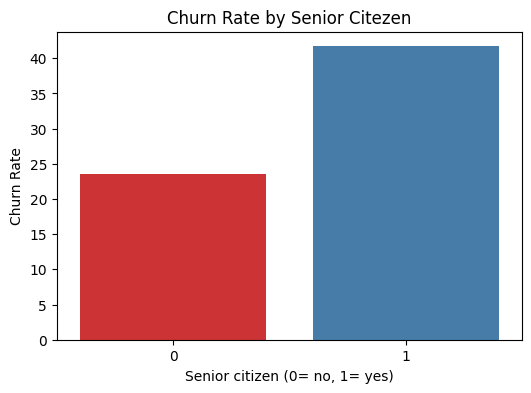

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=senior_churn.index, y = senior_churn.values, palette='Set1')
plt.xlabel("Senior citizen (0= no, 1= yes)")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Senior Citezen")

 Senior Citizens (41.68%) have a significantly higher churn rate compared to Non-Senior Citizens (23.61%).

-This suggests that older customers may be more likely to leave the service, potentially due to:
Higher sensitivity to pricing (if MonthlyCharges are higher).
Less familiarity with digital services (e.g., online billing, streaming).

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'New_Churn',
       'TenureSegment'],
      dtype='object')

In [ ]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
tenure_contract=df[df['Contract'].isin(['One year','Two year'])]

In [ ]:
tenure_contract['Contract'].unique()

array(['One year', 'Two year'], dtype=object)

Text(0, 0.5, 'Counts')

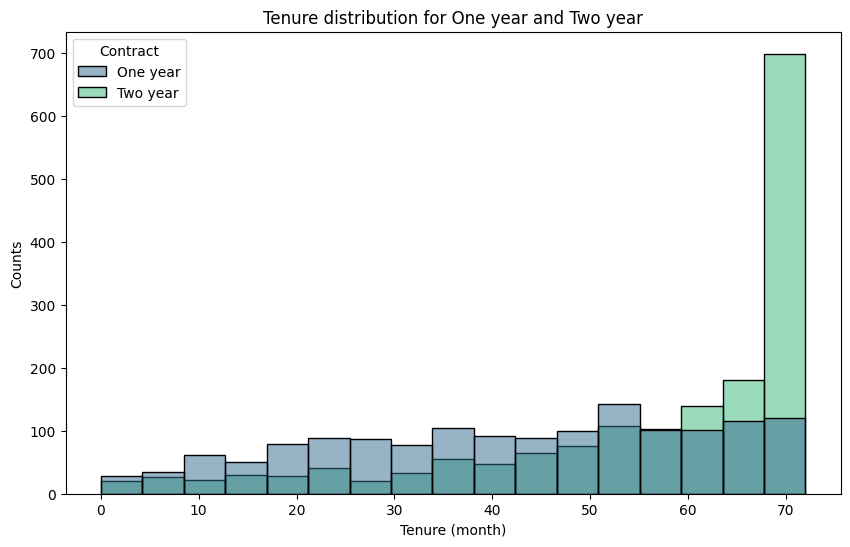

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=tenure_contract,x='tenure',hue='Contract',palette='viridis')
plt.title("Tenure distribution for One year and Two year")
plt.xlabel("Tenure (month)")
plt.ylabel("Counts")

Customers with Two year contract tend to have longer tenure compared to those with one year contract.

In [ ]:
#top 5 insights from this dataset for business action

1- Contract Type Strongly Impacts Churn
Month-to-month contracts have the highest churn rate, while one-year and two-year contracts have significantly lower churn.
Action: Offer discounts or incentives to encourage long-term contracts, such as bundling services or loyalty rewards.


- Electronic Check Payments Are Risky
Customers who pay via electronic check have the highest churn rate compared to other payment methods (e.g., credit card or bank transfer).
Action: Promote automatic payments or offer discounts for using more stable payment methods.


- Tech Support & Online Services Reduce Churn
Customers who have Tech Support, OnlineBackup, and DeviceProtection churn less frequently than those without.
Action: Encourage upselling of these services, possibly by offering free trials or bundled discounts.



- Senior Citizens & High Monthly Charges Are Linked to Churn
Senior citizens have a higher churn rate than younger customers.
Customers with higher MonthlyCharges (especially for Fiber Optic users) tend to churn more.
Action: Offer personalized discounts or flexible payment plans for senior citizens and high-billing customers.


- TotalCharges and Tenure Are Strongly Related
Long-term customers have much higher TotalCharges, but there are cases where customers with long tenure have low TotalCharges, suggesting discounted or grandfathered plans.
Action: Identify such customers and ensure pricing consistency or offer upgrades to increase revenue.

**Customer Churn Analysis Report**

## **1. Introduction**
Customer churn is a critical issue for telecom businesses, impacting revenue and long-term sustainability. This report presents an exploratory data analysis (EDA) to identify key patterns and drivers of customer churn, leveraging various customer attributes such as contract type, payment method, tenure, and additional services.

## **2. Data Overview**
- The dataset contains **7,043 customers**, with features like **MonthlyCharges, TotalCharges, tenure, Contract, PaymentMethod, and various service subscriptions**.
- The churn rate in the dataset is **26.5%**, indicating a significant portion of customers leaving the service.

## **3. Key Insights & Findings**

### **3.1 Contract Type Strongly Influences Churn**
- Customers on **Month-to-month contracts** have the highest churn rate.
- **One-year and two-year contract customers churn significantly less**.
- **Business Action:** Encourage long-term contracts via discounts or bundling.

### **3.2 Payment Method Impacts Churn**
- Customers using **electronic checks churn the most**, while those using **credit cards and bank transfers** churn less.
- **Business Action:** Promote **automatic payments** through incentives.

### **3.3 Tech Support and Additional Services Reduce Churn**
- Customers subscribed to **Tech Support, OnlineBackup, and DeviceProtection churn less**.
- **Business Action:** Increase **awareness and adoption** of these services through promotions.

### **3.4 Senior Citizens & High Monthly Charges Are Linked to Higher Churn**
- Senior citizens have a **higher churn rate (41.7%)** than younger customers (23.6%).
- Customers with **higher MonthlyCharges**, especially **Fiber Optic users**, churn more.
- **Business Action:** Offer **customized discounts or flexible payment plans** for seniors and high-paying customers.

### **3.5 Relationship Between Tenure and TotalCharges**
- Longer tenure customers have **higher TotalCharges**, but some long-term customers still pay low amounts, indicating possible discounted or legacy plans.
- **Business Action:** Identify such customers for **upsell opportunities or pricing adjustments**.

## **4. Predictive Modeling & Feature Importance**
- A machine learning model can predict churn using features like **contract type, payment method, tenure, and additional services**.
- **Feature importance analysis** shows that **tenure, contract type, and MonthlyCharges** are the top predictors of churn.

## **5. Business Recommendations**
1. **Convert month-to-month customers to longer-term contracts** using targeted incentives.
2. **Reduce reliance on electronic check payments** by encouraging auto-pay enrollment.
3. **Increase adoption of value-added services** like Tech Support and Online Backup.
4. **Provide special discounts for senior citizens** and customers with high MonthlyCharges.
5. **Identify long-term customers with low TotalCharges** and upsell higher-tier plans.

## **6. Conclusion**
By addressing the key drivers of churn, telecom companies can **improve customer retention, increase revenue, and enhance customer satisfaction**. Implementing targeted interventions based on data-driven insights will help reduce churn and strengthen customer loyalty.

